In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
conda install libpython m2w64-toolchain -c msys2

In [1]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ashok.thirunavukaras\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ashok.thirunavukaras\\AppData\\Local\\Temp\\pip-install-debg0p2j\\fbprophet_d6b0643b837e4807812bc6d060e45367\\setup.py'"'"'; __file__='"'"'C:\\Users\\ashok.thirunavukaras\\AppData\\Local\\Temp\\pip-install-debg0p2j\\fbprophet_d6b0643b837e4807812bc6d060e45367\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ashok.thirunavukaras\AppData\Local\Temp\pip-wheel-uk4jadvr'
       cwd: C:\Users\ashok.thirunavukaras\AppData\Local\Temp\pip-install-debg0p2j\fbprophet_d6b0643b837e4807812bc6d060e45367\
  Complete output (198 lines):
  running bdist_wheel
  running 

In [3]:
import pandas as pd
from prophet import Prophet

In [4]:
df = pd.read_csv('D:\Power BI Learning\Power BI\PNG Format\TimeSeriesForecastingProphet-main\TimeSeriesForecastingProphet-main\dataset.csv')

In [5]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [6]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [7]:
df

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531000,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000000,2018,01,5,2018-01-05
...,...,...,...,...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,12,2020-12-12
1076,13122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,13,2020-12-13
1077,14122020,2667437,QLD_CW_ST0203,3383.354511,2020,12,14,2020-12-14
1078,15122020,2667437,QLD_CW_ST0203,2714.591329,2020,12,15,2020-12-15


In [8]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [9]:
df

,y,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


In [10]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

C:\Users\ashok.thirunavukaras\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [11]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

C:\Users\ashok.thirunavukaras\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ashok.thirunavukaras\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.489276,768.292894,3900.268008,3041.489276,3041.489276,-641.915345,-641.915345,-641.915345,467.724032,...,16.611941,16.611941,16.611941,-1126.251318,-1126.251318,-1126.251318,0.0,0.0,0.0,2399.573931
1,2018-01-02,3042.246698,866.547224,3967.035570,3042.246698,3042.246698,-652.029690,-652.029690,-652.029690,467.724032,...,-11.285067,-11.285067,-11.285067,-1108.468655,-1108.468655,-1108.468655,0.0,0.0,0.0,2390.217008
2,2018-01-03,3043.004119,761.046565,4101.718134,3043.004119,3043.004119,-626.188801,-626.188801,-626.188801,467.724032,...,-4.407267,-4.407267,-4.407267,-1089.505566,-1089.505566,-1089.505566,0.0,0.0,0.0,2416.815318
3,2018-01-04,3043.761541,844.310441,4041.805643,3043.761541,3043.761541,-579.252371,-579.252371,-579.252371,467.724032,...,22.462032,22.462032,22.462032,-1069.438435,-1069.438435,-1069.438435,0.0,0.0,0.0,2464.509170
4,2018-01-05,3044.518962,973.007181,4140.163561,3044.518962,3044.518962,-615.260367,-615.260367,-615.260367,467.724032,...,-34.588120,-34.588120,-34.588120,-1048.396280,-1048.396280,-1048.396280,0.0,0.0,0.0,2429.258595


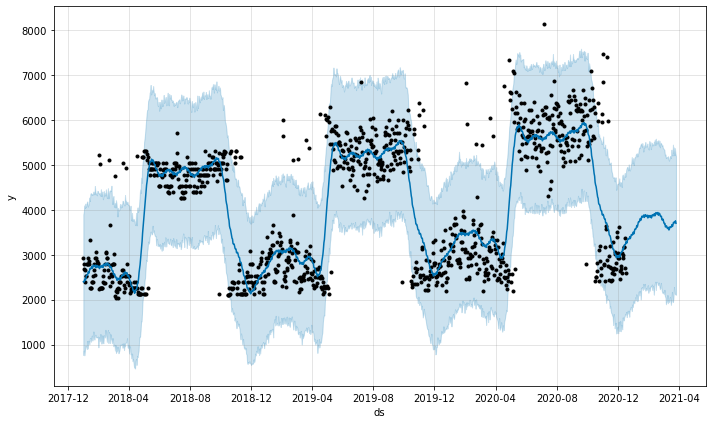

In [12]:
plot1 = m.plot(forecast)

C:\Users\ashok.thirunavukaras\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ashok.thirunavukaras\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ashok.thirunavukaras\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


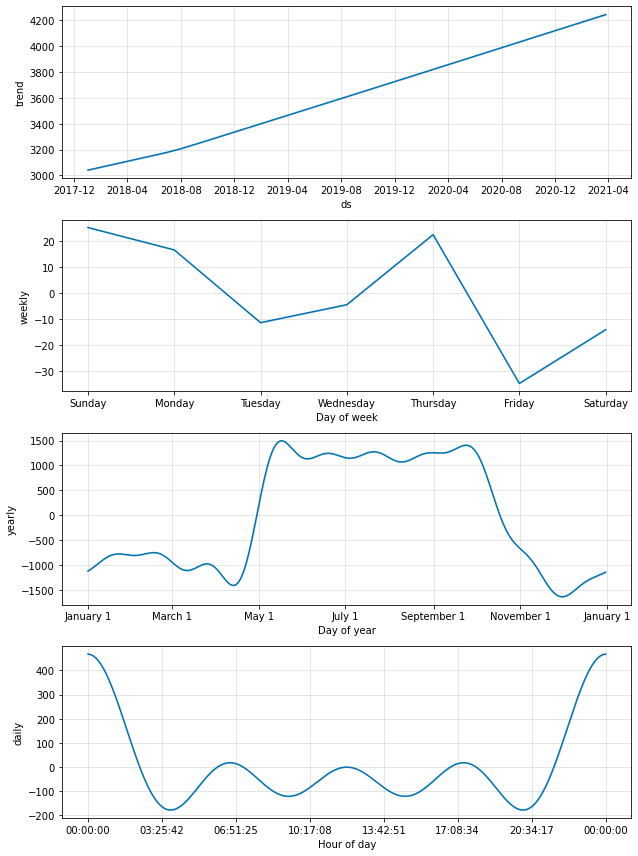

In [13]:
plt2 = m.plot_components(forecast)